# Exploring Deutsch's Algorithm


## Introduction
Deutsch's Algorithm is a fundamental quantum computing algorithm. It serves as one of the first examples of a quantum algorithm that performs better than any classical counterpart. This algorithm is designed to solve a specific problem in the quantum computing domain, showcasing the power of quantum superposition and interference.

### The Problem
The problem addressed by Deutsch's Algorithm involves a function `f(x)` that takes a binary input (0 or 1) and produces a binary output (0 or 1). There are four possible functions of this type:

1. The constant function that always returns 0.
2. The constant function that always returns 1.
3. The balanced function that returns 0 for input 0 and 1 for input 1.
4. The balanced function that returns 1 for input 0 and 0 for input 1.

The challenge is to determine whether the given function `f(x)` is constant (the same output for all inputs) or balanced (different output for each input) by using the function only once. 

### Deutsch's Algorithm
Deutsch's Algorithm provides a quantum solution to this problem. It utilizes the principles of quantum superposition, entanglement, and interference to determine the nature of the function with a single query, which is impossible in the classical computing paradigm.

In the following sections, we will dive into the details of Deutsch's Algorithm, including its quantum circuit, the mathematics behind it, and how it solves the stated problem.


## Example

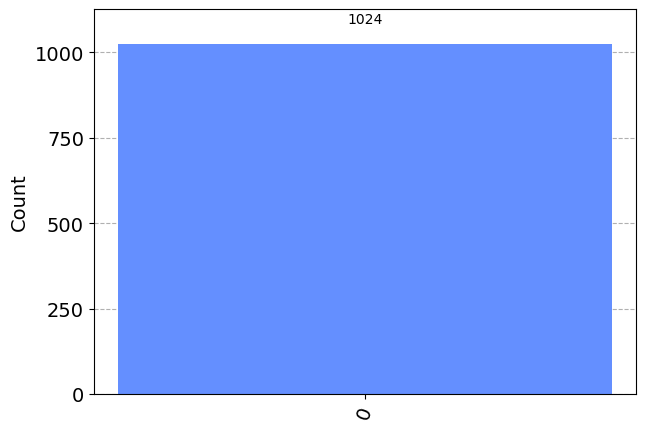

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum circuit for Deutsch's algorithm
def deutsch_algorithm(oracle):
    # Create a 2-qubit quantum circuit
    qc = QuantumCircuit(2, 1)

    # Apply a Hadamard gate to both qubits
    qc.h(0)
    qc.h(1)

    # Apply the oracle
    qc.append(oracle, [0, 1])

    # Apply another Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    return qc

# Example oracles
# Constant oracle
constant_oracle = QuantumCircuit(2)
# Uncomment the next line for a different constant oracle
# constant_oracle.x(1) 

# Balanced oracle
balanced_oracle = QuantumCircuit(2)
balanced_oracle.cx(0, 1)

# Choose the oracle you want to test
oracle = balanced_oracle  # Change to constant_oracle to test the constant case

# Create the circuit for Deutsch's algorithm
qc = deutsch_algorithm(oracle)

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts()

# Plot the result
plot_histogram(counts)


## Expanded Explanation of the Problem


## In-depth Explanation of Deutsch’s Algorithm


In [ ]:
# TODO: Add Qiskit code to build the quantum circuit for Deutsch's Algorithm

In [ ]:
# TODO: Add code to simulate the circuit and demonstrate the algorithm